In [1]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

In [2]:
import pandas as pd
data=pd.read_csv('pima-indians-diabetes.csv')

In [3]:
data

,N_times_pregnant,oral_glucose,blood_pressure,Triceps_skin_fold_thickness,serum_insulin,Body_mass_index,Diabetes_pedigree_function,Age,target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
import numpy as np
data['blood_pressure']=data['blood_pressure'].replace(0, np.NaN)

In [6]:
data['Triceps_skin_fold_thickness']=data['Triceps_skin_fold_thickness'].replace(0, np.NaN)
data['serum_insulin']=data['serum_insulin'].replace(0, np.NaN)
data['Body_mass_index']=data['Body_mass_index'].replace(0, np.NaN)

In [7]:
data

,N_times_pregnant,oral_glucose,blood_pressure,Triceps_skin_fold_thickness,serum_insulin,Body_mass_index,Diabetes_pedigree_function,Age,target
0,6,148,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126,60.0,NaN,NaN,30.1,0.349,47,1


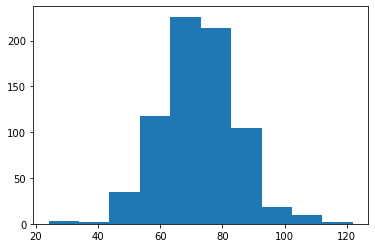

In [8]:
import matplotlib.pyplot as plt
plt.hist(data['blood_pressure'])
plt.show()

In [9]:
# data['blood_pressure']

# #변환
# from impyute.imputation.cs import fast_knn
# np_imputed=fast_knn(data['blood_pressure'].values(), k=5)# KNN 학습 
# df_imputed = pd.DataFrame(np_imputed)

# # 변환 후 데이터 확인
# df_imputed.head(10)

In [10]:
from sklearn.impute import KNNImputer

In [11]:
not_cat_df = data[[col for col in data.columns if col in ['blood_pressure','Triceps_skin_fold_thickness','serum_insulin','Body_mass_index']]].copy()

In [12]:
not_cat_df

,blood_pressure,Triceps_skin_fold_thickness,serum_insulin,Body_mass_index
0,72.0,35.0,NaN,33.6
1,66.0,29.0,NaN,26.6
2,64.0,NaN,NaN,23.3
3,66.0,23.0,94.0,28.1
4,40.0,35.0,168.0,43.1
...,...,...,...,...
763,76.0,48.0,180.0,32.9
764,70.0,27.0,NaN,36.8
765,72.0,23.0,112.0,26.2
766,60.0,NaN,NaN,30.1


In [13]:
int_col = data.columns[data.dtypes != 'object'].to_list()
cat_col = data.columns[data.dtypes == 'object'].to_list()

In [14]:
imputer = KNNImputer(n_neighbors=5)
# df_filled = imputer.fit_transform(not_cat_df) ## parameter df 에 카테고리변수가 있으면 무조건 에러난다. 즉. 카테고리칼 변수는 KNN 으로 missing value 처리할 수 없다.
df_filled = imputer.fit_transform(data[int_col])

In [15]:
df_filled

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [16]:
data.head(10)

,N_times_pregnant,oral_glucose,blood_pressure,Triceps_skin_fold_thickness,serum_insulin,Body_mass_index,Diabetes_pedigree_function,Age,target
0,6,148,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116,74.0,NaN,NaN,25.6,0.201,30,0
6,3,78,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115,NaN,NaN,NaN,35.3,0.134,29,0
8,2,197,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125,96.0,NaN,NaN,NaN,0.232,54,1


In [17]:
new_col=['N_times_pregnant','oral_glucose','blood_pressure','Triceps_skin_fold_thickness','serum_insulin',
         'Body_mass_index','Diabetes_pedigree_function','Age','target']
new_data= pd.DataFrame(df_filled, columns=new_col)

In [18]:
new_data.head(10)

,N_times_pregnant,oral_glucose,blood_pressure,Triceps_skin_fold_thickness,serum_insulin,Body_mass_index,Diabetes_pedigree_function,Age,target
0,6.0,148.0,72.0,35.0,169.0,33.60,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,58.6,26.60,0.351,31.0,0.0
2,8.0,183.0,64.0,25.8,164.6,23.30,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.10,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.10,2.288,33.0,1.0
5,5.0,116.0,74.0,20.6,102.8,25.60,0.201,30.0,0.0
6,3.0,78.0,50.0,32.0,88.0,31.00,0.248,26.0,1.0
7,10.0,115.0,77.6,34.4,132.6,35.30,0.134,29.0,0.0
8,2.0,197.0,70.0,45.0,543.0,30.50,0.158,53.0,1.0
9,8.0,125.0,96.0,26.4,165.8,34.92,0.232,54.0,1.0


In [20]:
new_data.shape

(768, 9)

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor as dtr
from sklearn.preprocessing import StandardScaler
import pydotplus
from sklearn import tree
from IPython.display import Image
import numpy as np


In [19]:
X=new_data.iloc[:,:-1]
Y=new_data.iloc[:,-1]

In [20]:
Y

0      1.0
1      0.0
2      1.0
3      0.0
4      1.0
      ... 
763    0.0
764    0.0
765    0.0
766    1.0
767    0.0
Name: target, Length: 768, dtype: float64

In [34]:

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)



In [58]:
from sklearn.tree import DecisionTreeClassifier

clf_tree =DecisionTreeClassifier(criterion = 'gini', max_depth=5, random_state=42) 

clf_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [59]:
train_acc = clf_tree.score(X_train,y_train)
test_acc = clf_tree.score(X_test,y_test)
print(train_acc)
print(test_acc)

0.8550488599348535
0.7467532467532467


In [60]:
y_pred_prob = clf_tree.predict_proba(X_test)
y_pred_prob

array([[0.34722222, 0.65277778],
       [0.71794872, 0.28205128],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.33333333, 0.66666667],
       [0.34722222, 0.65277778],
       [1.        , 0.        ],
       [0.34722222, 0.65277778],
       [0.36764706, 0.63235294],
       [0.36764706, 0.63235294],
       [0.76470588, 0.23529412],
       [0.04081633, 0.95918367],
       [0.36764706, 0.63235294],
       [1.        , 0.        ],
       [0.94444444, 0.05555556],
       [0.71794872, 0.28205128],
       [0.71794872, 0.28205128],
       [1.        , 0.        ],
       [0.9       , 0.1       ],
       [0.90909091, 0.09090909],
       [0.8       , 0.2       ],
       [0.76470588, 0.23529412],
       [0.8       , 0.2       ],
       [1.        , 0.        ],
       [0.36764706, 0.63235294],
       [0.04081633, 0.95918367],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.76470588, 0.23529412],
       [0.

In [61]:
y_pred = clf_tree.predict(X_test)
print(y_pred)

[1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0.
 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1.
 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0.
 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 1. 0. 1. 1. 0.]


In [62]:
train_acc = clf_tree.score(X_train,y_train)
test_acc = clf_tree.score(X_test,y_test)

print(f'Train_Accuracy: {train_acc}')
print(f'Test_Accuracy: {test_acc}')

Train_Accuracy: 0.8550488599348535
Test_Accuracy: 0.7467532467532467


In [102]:
# from sklearn import tree
# clf_tree =DecisionTreeClassifier(criterion = 'gini', max_depth=5, random_state=0) 
# tree.plot_tree(clf_tree.fit(X_train, y_train)) 

In [391]:

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)



In [392]:
from sklearn.tree import DecisionTreeClassifier

clf_tree =DecisionTreeClassifier(criterion = 'gini', max_depth=5) 

clf_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [393]:
train_acc = clf_tree.score(X_train,y_train)
test_acc = clf_tree.score(X_test,y_test)

print(f'Train_Accuracy: {train_acc}')
print(f'Test_Accuracy: {test_acc}')

Train_Accuracy: 0.8110749185667753
Test_Accuracy: 0.7012987012987013


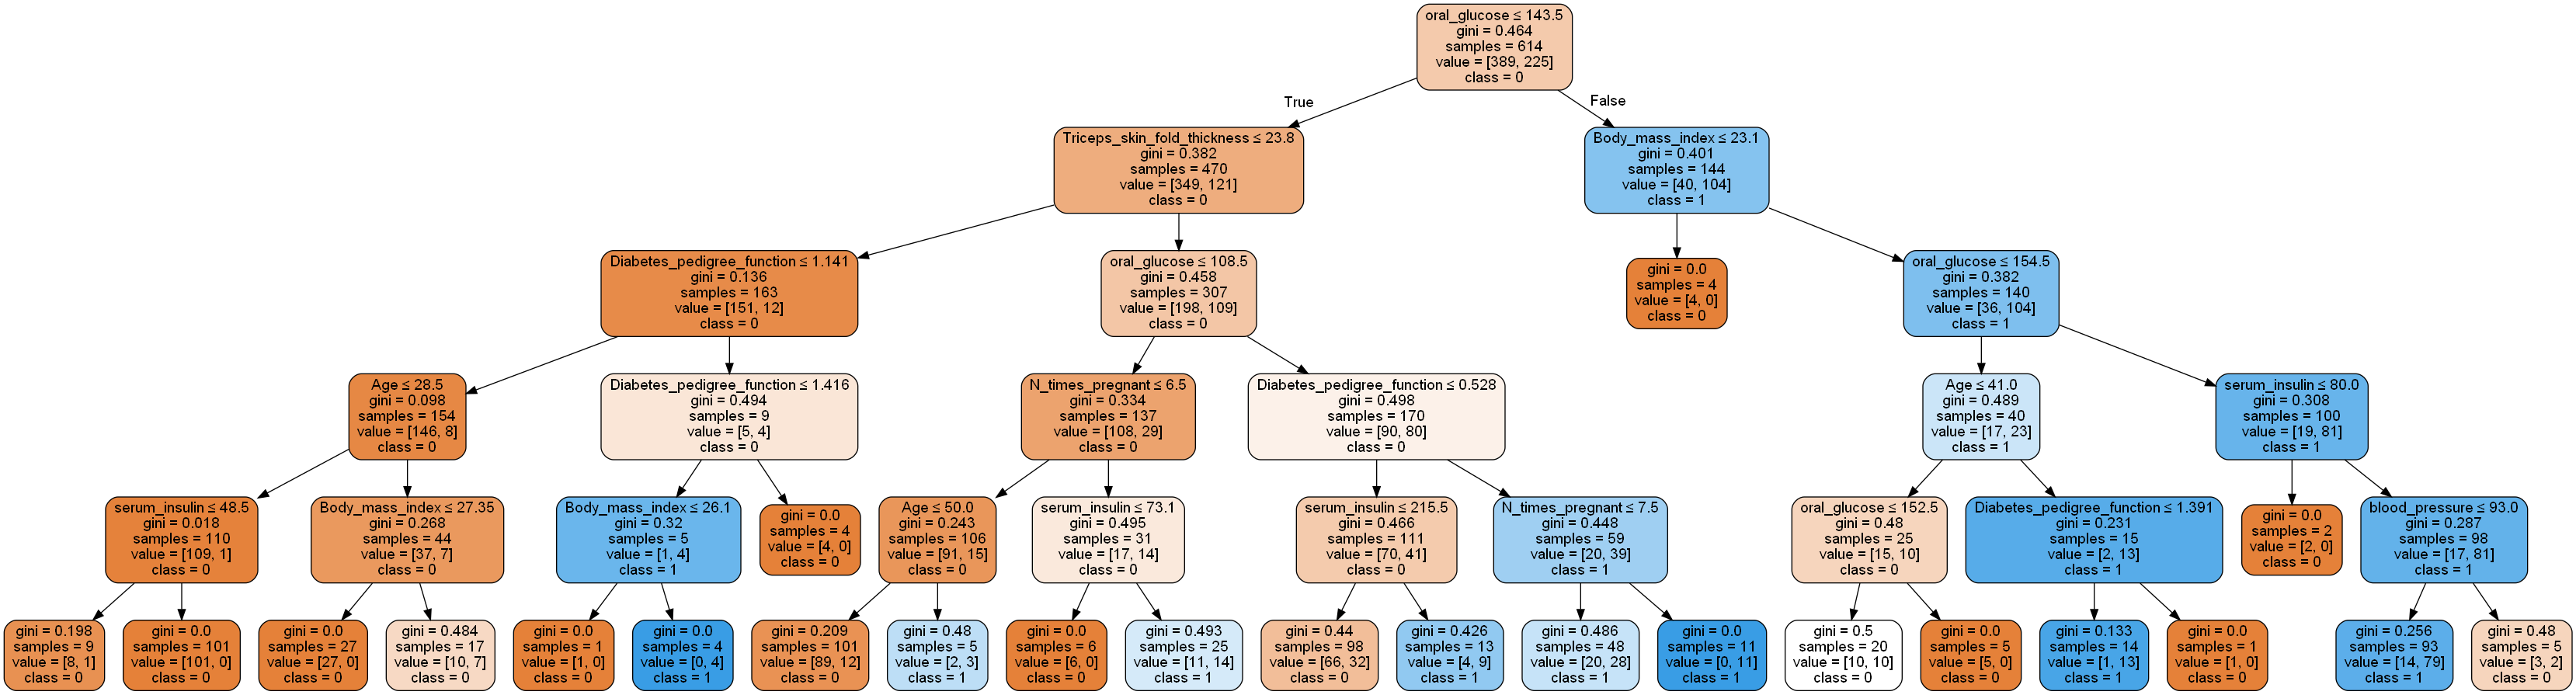

In [394]:
col_names=['N_times_pregnant','oral_glucose','blood_pressure','Triceps_skin_fold_thickness','serum_insulin','Body_mass_index','Diabetes_pedigree_function','Age']
dot_data = export_graphviz(clf_tree, out_file=None, feature_names=col_names,
                          class_names=['0','1'], filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [66]:
test_acc = clf2_tree.score(X_test,y_test)
test_acc

0.7467532467532467

In [67]:
y_pred_prob = clf2_tree.predict_proba(X_test)
y_pred_prob

array([[0.34722222, 0.65277778],
       [0.71794872, 0.28205128],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.78947368, 0.21052632],
       [0.34722222, 0.65277778],
       [1.        , 0.        ],
       [0.34722222, 0.65277778],
       [0.43157895, 0.56842105],
       [0.43157895, 0.56842105],
       [0.84615385, 0.15384615],
       [0.16129032, 0.83870968],
       [0.        , 1.        ],
       [0.84615385, 0.15384615],
       [0.94444444, 0.05555556],
       [0.71794872, 0.28205128],
       [0.71794872, 0.28205128],
       [1.        , 0.        ],
       [0.16129032, 0.83870968],
       [0.43157895, 0.56842105],
       [0.8       , 0.2       ],
       [0.84615385, 0.15384615],
       [0.8       , 0.2       ],
       [1.        , 0.        ],
       [0.43157895, 0.56842105],
       [0.16129032, 0.83870968],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.84615385, 0.15384615],
       [0.

In [68]:
y_pred = clf2_tree.predict(X_test)
print(y_pred)

[1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.
 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0.
 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1.
 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0.
 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 1. 0. 1. 0. 0.]


In [569]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [570]:
from sklearn.tree import DecisionTreeClassifier

clf2_tree =DecisionTreeClassifier(criterion = 'entropy', max_depth=6) 

clf2_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [571]:
train_acc = clf2_tree.score(X_train,y_train)
test_acc = clf2_tree.score(X_test,y_test)

print(f'Train_Accuracy: {train_acc}')
print(f'Test_Accuracy: {test_acc}')

Train_Accuracy: 0.8387622149837134
Test_Accuracy: 0.7597402597402597


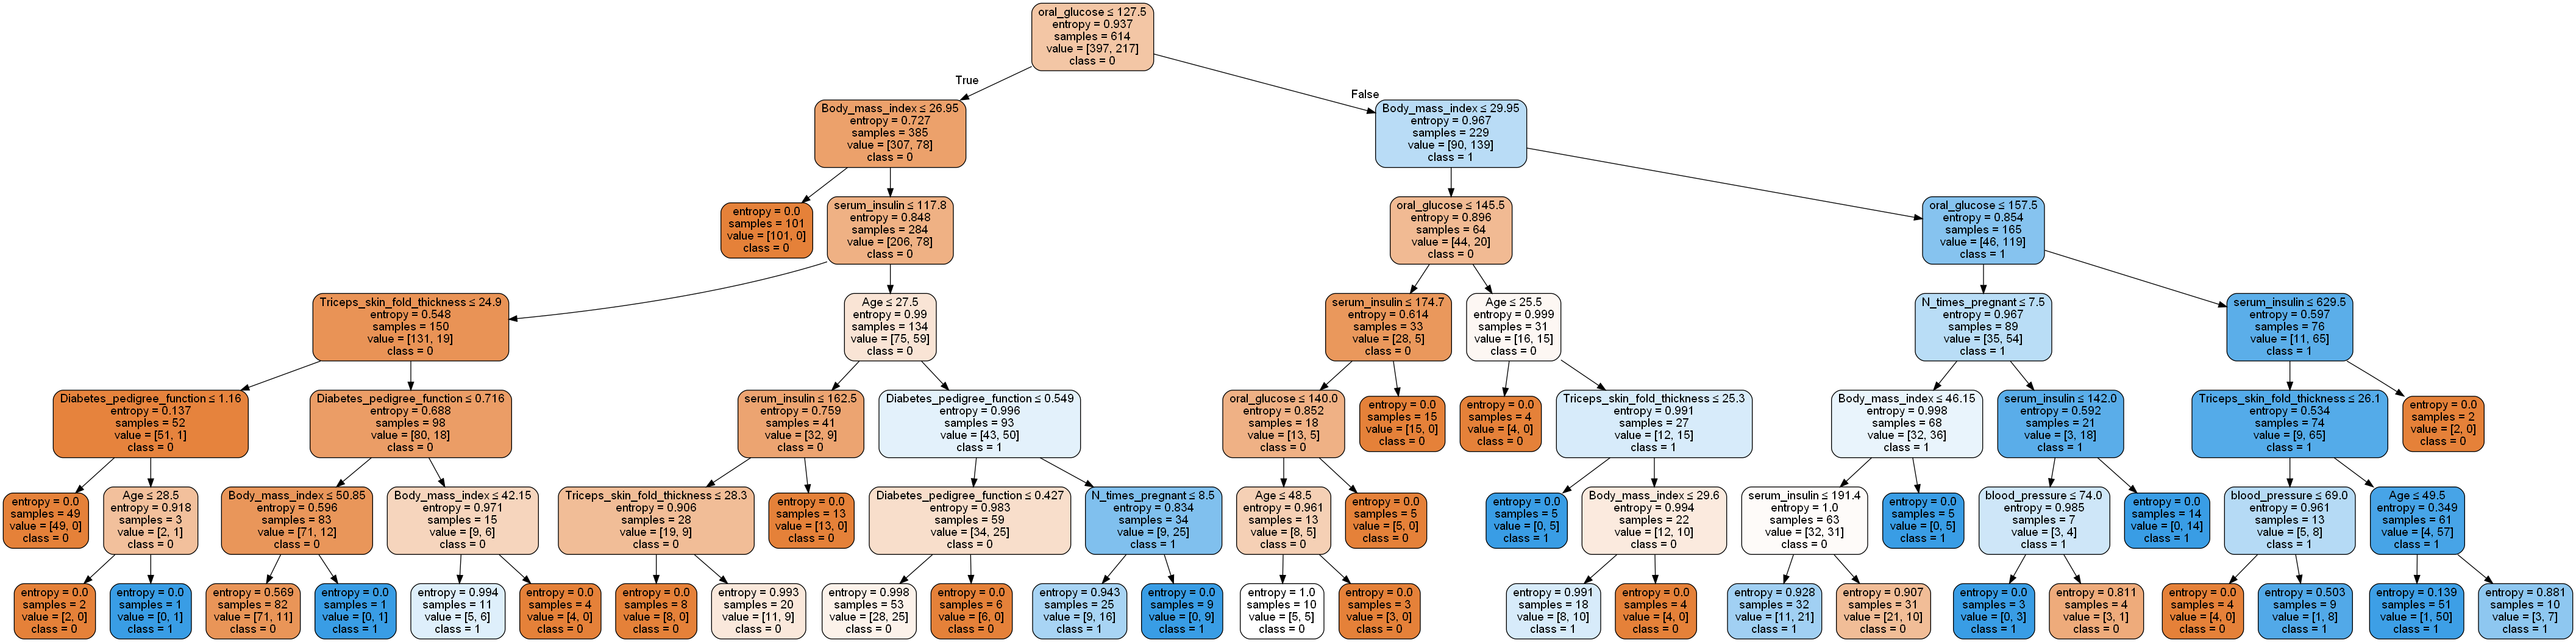

In [572]:
col_names=['N_times_pregnant','oral_glucose','blood_pressure','Triceps_skin_fold_thickness','serum_insulin','Body_mass_index','Diabetes_pedigree_function','Age']
dot_data = export_graphviz(clf2_tree, out_file=None, feature_names=col_names,
                          class_names=['0','1'], filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [130]:
# 데이터 표준화 작업
sc = StandardScaler()
sc.fit(X_train)


StandardScaler()

In [185]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=1000, oob_score=True, \
                            criterion='gini', max_depth=2, random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, n_estimators=1000, oob_score=True,
                       random_state=42)

In [186]:
print(rfc.oob_score_)
print(rfc.score(X_test,y_test))

0.755700325732899
0.7727272727272727


In [187]:
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [188]:
print(clf_tree.score(X_test,y_test))
print(rfc.score(X_test,y_test))

0.7467532467532467
0.7727272727272727


In [189]:
X.shape[1]

8

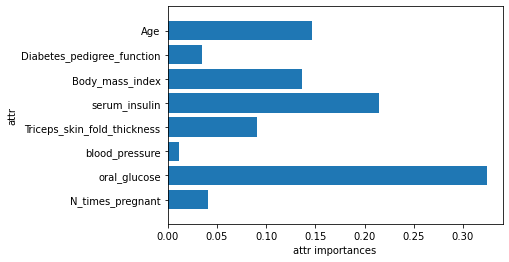

In [190]:
def plot_feature_importances(model):

    n_features = X.shape[1]

    plt.barh(range(n_features), model.feature_importances_, align='center')
    
    columns= ['N_times_pregnant','oral_glucose','blood_pressure','Triceps_skin_fold_thickness','serum_insulin','Body_mass_index','Diabetes_pedigree_function','Age']
    
    plt.yticks(range(n_features),columns)

    plt.xlabel("attr importances")

    plt.ylabel("attr")

    plt.ylim(-1, n_features)

plot_feature_importances(rfc)
plt.show()

In [126]:
X.shape[1]

8

In [191]:
from sklearn.ensemble import RandomForestClassifier

rfc2 = RandomForestClassifier(n_estimators=100, oob_score=True, \
                            criterion='entropy', max_depth=2, random_state=42)
rfc2.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=2, oob_score=True,
                       random_state=42)

In [192]:
print(rfc2.oob_score_)
print(rfc2.score(X_test,y_test))

0.749185667752443
0.7857142857142857


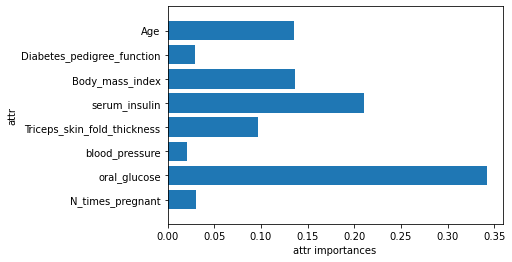

In [193]:
plot_feature_importances(rfc2)
plt.show()

In [171]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf=GradientBoostingClassifier( n_estimators=1000, random_state=42)

gb_clf.fit(X,Y)

GradientBoostingClassifier(n_estimators=1000, random_state=42)

In [172]:
# classfication Probability
# 0 -> -1, 1 -> 1로 대응
# -1확률, 1확률
y_prob = gb_clf.predict_proba(X)
y_prob

array([[0.01597395, 0.98402605],
       [0.99744912, 0.00255088],
       [0.00377543, 0.99622457],
       ...,
       [0.99627517, 0.00372483],
       [0.00743422, 0.99256578],
       [0.9968614 , 0.0031386 ]])

In [174]:
y_pred = gb_clf.predict(X)
y_pred

array([1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 0., 0., 0.

1000
[1.22675803 1.17385298 1.12901403 1.09127053 1.05921388 1.03070026
 1.00540485 0.98299241 0.96238154 0.9444678  0.92627578 0.91144984
 0.8960178  0.88250417 0.87111842 0.86031539 0.85018538 0.83880076
 0.8273796  0.81918509 0.8101685  0.80161873 0.79435303 0.78720156
 0.78085954 0.77383634 0.76712469 0.76162397 0.75501518 0.74973592
 0.74304111 0.7384323  0.73460534 0.72757211 0.72193982 0.71653471
 0.71155462 0.70719552 0.70031321 0.69650646 0.69290849 0.68883449
 0.68302952 0.68099273 0.67619574 0.67076888 0.66736685 0.66296738
 0.66100919 0.65882024 0.65577803 0.65401263 0.64918255 0.64618184
 0.64242732 0.63779084 0.63519855 0.63205372 0.62932889 0.62708831
 0.62313704 0.6214042  0.61841236 0.61042548 0.60657993 0.60404562
 0.60125006 0.59787788 0.5946793  0.59260649 0.59082212 0.58834918
 0.58474493 0.58081468 0.57758042 0.57567254 0.5726312  0.56883763
 0.56781718 0.56546649 0.56410311 0.56093698 0.55930502 0.55624471
 0.55287737 0.54824592 0.54483584 0.54353697 0.54106963 0

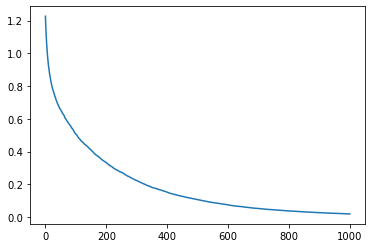

In [175]:
# staged_score 새로운 data에 대해서 누적한 값
# 그 누적값을 학습한 값들을 기록함 
print(len(gb_clf.train_score_))
print(gb_clf.train_score_)

# residual이니깐 계속 값이 떨어지는 것임
plt.plot(gb_clf.train_score_)

In [176]:
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV

gb = GradientBoostingClassifier(random_state=42)

# n_estimators: tree 갯수, max_features: 
param_grid = [{'n_estimators': range(1, 1000, 50), 'max_features': range(1, 10),
              'max_depth': range(3, 5), 'learning_rate': np.linspace(0.01, 0.1, 10)}]

gs = GridSearchCV(estimator=gb, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

gs.fit(X_train, y_train)

Fitting 5 folds for each of 3600 candidates, totalling 18000 fits


C:\Users\BM\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:921: UserWarning: One or more of the test scores are non-finite: [0.65309876 0.65797681 0.73939757 ...        nan        nan        nan]
  category=UserWarning


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid=[{'learning_rate': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ]),
                          'max_depth': range(3, 5),
                          'max_features': range(1, 10),
                          'n_estimators': range(1, 1000, 50)}],
             scoring='accuracy', verbose=1)

In [399]:
# 모든 모델 중 가장 성능이 좋은 것을 뽑는 best estimator # n_estimators가 제일 높은 모델이 선정되는 것이 대부분
best_gsb_estimator = gs.best_estimator_
best_gsb_estimator

GradientBoostingClassifier(learning_rate=0.05000000000000001, max_features=1,
                           n_estimators=51, random_state=42)

In [400]:
best_gsb_estimator.score(X_train,y_train)

0.7947882736156352

In [401]:
best_gsb_estimator.score(X_test,y_test)

0.8571428571428571

In [179]:
best_feature_importances = best_gsb_estimator.feature_importances_
best_feature_importances

array([0.08687084, 0.27202075, 0.02280989, 0.07237262, 0.18186869,
       0.14333229, 0.06278248, 0.15794244])

In [395]:
best_gsb_estimator.min_samples_split

2

In [184]:
print("Best Estimator Parameters" )
print("---------------------------" )
print("n_estimators: %d" %best_gsb_estimator.n_estimators )
print("max_depth: %d" %best_gsb_estimator.max_depth )
print("Learning Rate: %.3f" %best_gsb_estimator.learning_rate )
print("min_samples_leaf: %d" %best_gsb_estimator.min_samples_leaf )
print("max_features: %d" %best_gsb_estimator.max_features) 
print("---------------------------" )

Best Estimator Parameters
---------------------------
n_estimators: 51
max_depth: 3
Learning Rate: 0.050
min_samples_leaf: 1
max_features: 1
---------------------------


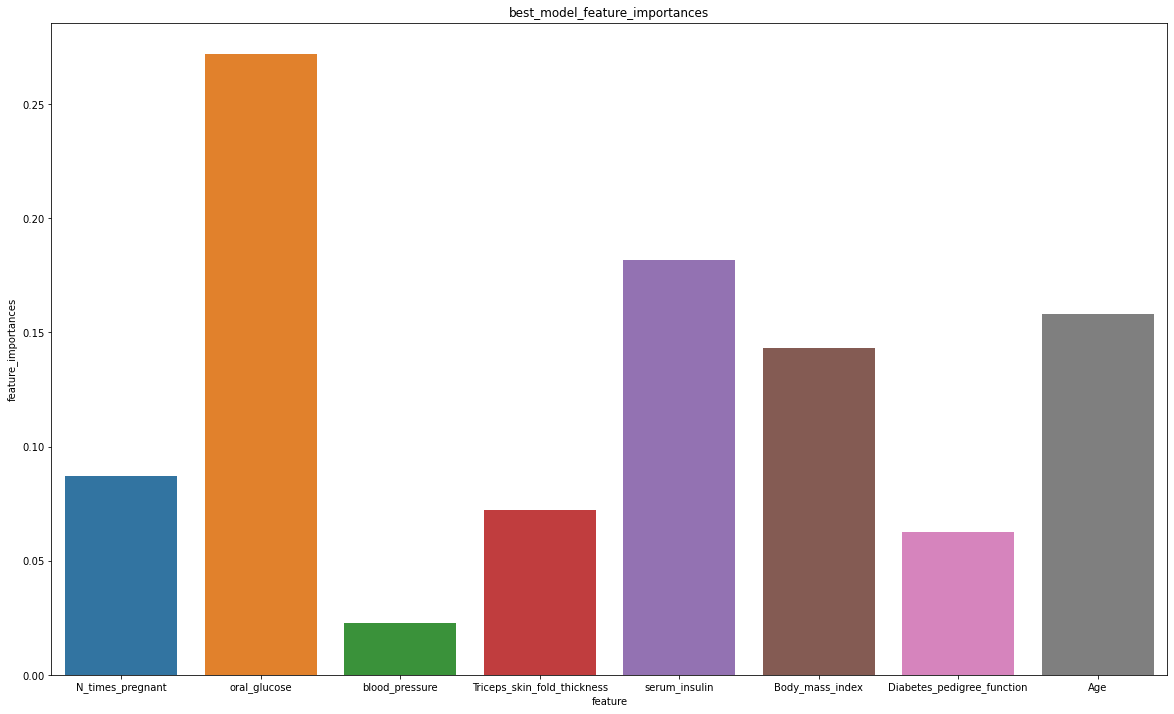

In [181]:
import seaborn as sns

ft_importances = pd.Series(best_feature_importances)
columns= ['N_times_pregnant','oral_glucose','blood_pressure','Triceps_skin_fold_thickness','serum_insulin','Body_mass_index','Diabetes_pedigree_function','Age']
plt.figure(figsize=(20,12))
plt.title("best_model_feature_importances")
plt.xlabel("feature")
plt.ylabel("feature_importances")
sns.barplot(x=np.linspace(1,8, 8), y=ft_importances).set_xticklabels(columns)

plt.show()

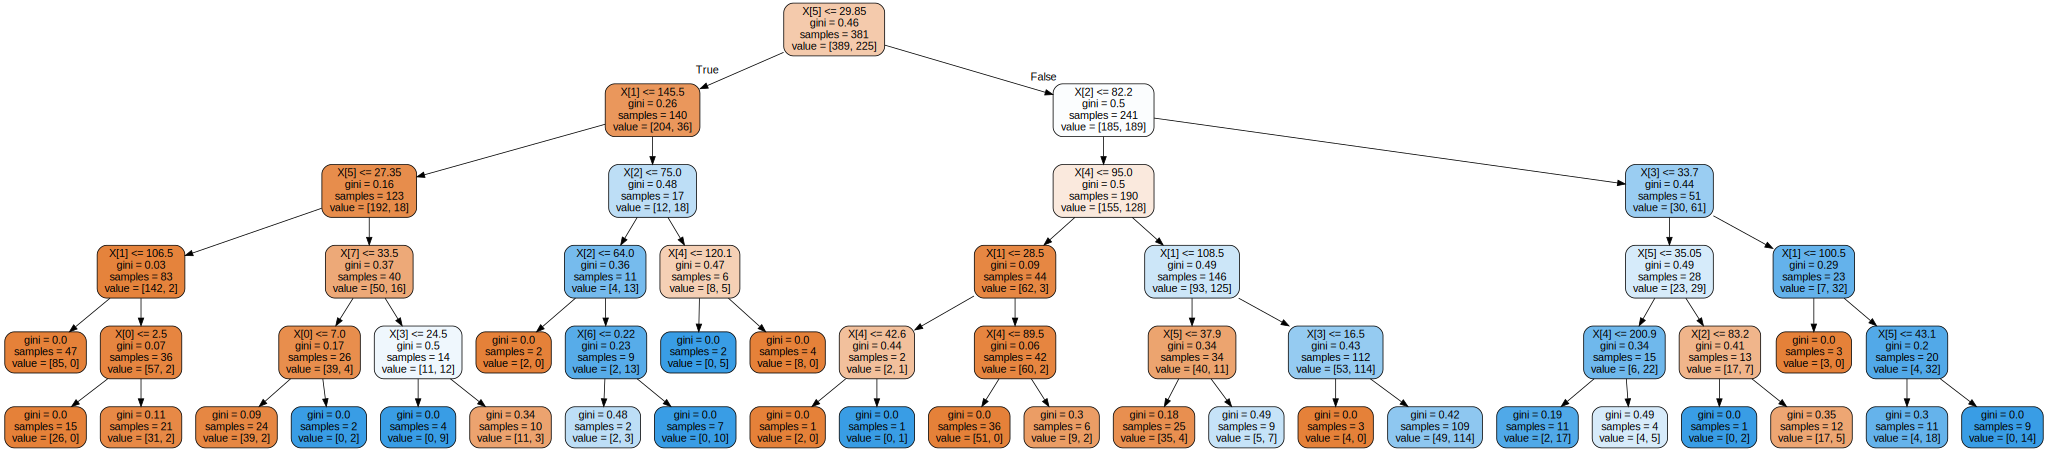

In [46]:
estimator = rfc.estimators_[15]

import graphviz
from sklearn.tree import export_graphviz

# Export as dot file
dot_data = export_graphviz(estimator, 
                rounded = True, proportion = False, 
                precision = 2, filled = True)

graph = graphviz.Source(dot_data)  
graph